In [4]:
#EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
#Show DataFrame info.
import pandas as pd
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
df = pd.read_csv(r"C:\Users\Anderson\Desktop\ironhack\Ironhack labs\lab-customer-analysis-round-3\lab-customer-analysis-round-3\files_for_lab\csv_files\marketing_customer_analysis.csv")

cols = []
for i in range(len(df.columns)): 
    cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
#Show DataFrame info.
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [12]:
#Describe DataFrame.
df.describe

<bound method NDFrame.describe of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor  

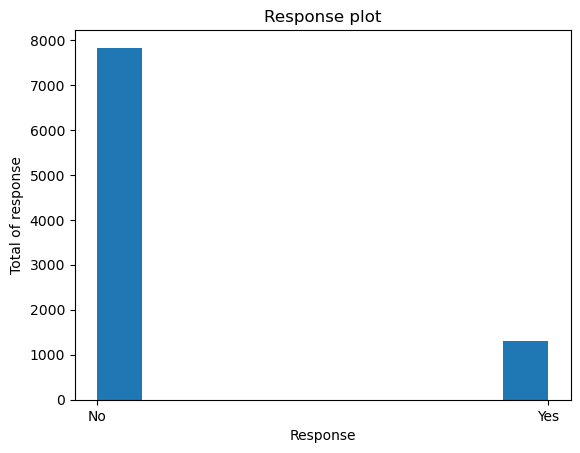

In [13]:
#Show a plot of the total number of responses.

plt.hist(df['response'])

plt.xlabel('Response')
plt.ylabel('Total of response')
plt.title('Response plot')

plt.show() 

In [14]:
#Show a plot of the response rate by the sales channel.
plot2 = df.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().fillna(0)

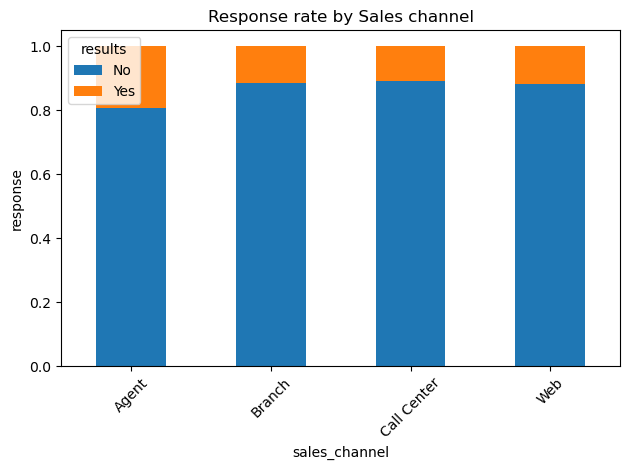

In [15]:
plot2.plot(kind='bar', stacked=True)
plt.title('Response rate by Sales channel')
plt.xlabel('sales_channel')
plt.ylabel('response')
plt.legend(title='results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
#Show a plot of the response rate by the total claim amount.
plot3 = df.groupby('total_claim_amount')['response'].value_counts(normalize=True).unstack().fillna(0)

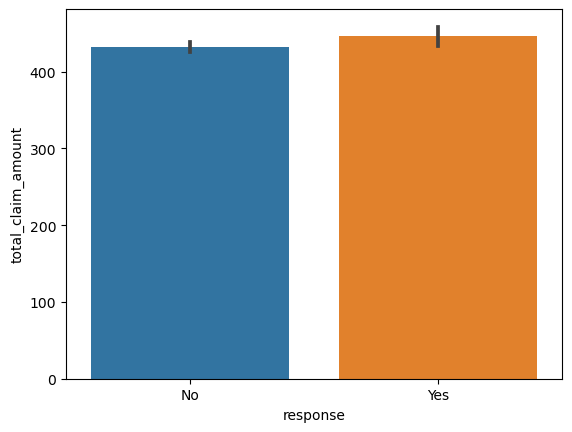

In [17]:
sns.barplot(x=df['response'], y=df['total_claim_amount'], data=df, estimator='mean') 
plt.show()

In [18]:
#Show a plot of the response rate by income.

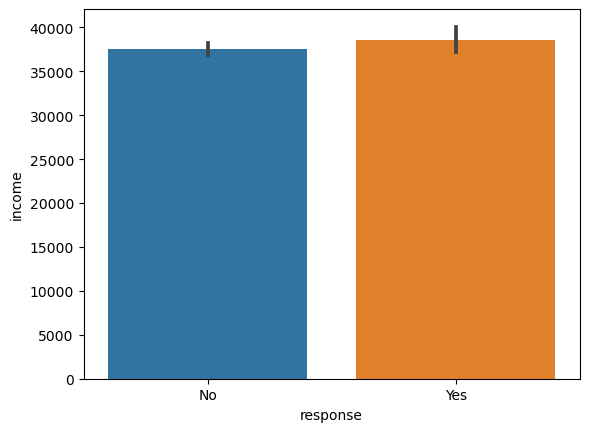

In [19]:
sns.barplot(x=df['response'], y=df['income'], data=df, estimator='mean') 
plt.show()

In [20]:
###Lab Customer Analysis Round 4

In [21]:
#Check the data types of the columns. 
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [22]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [23]:
numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [24]:
categoricals = df.select_dtypes(include='object')
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [25]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#Do the distributions for different numerical variables look like a normal distribution

In [26]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


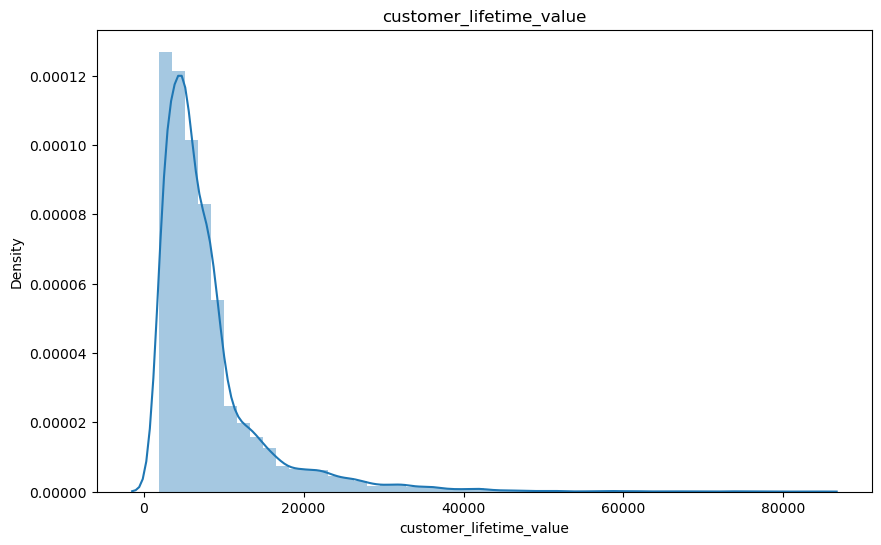

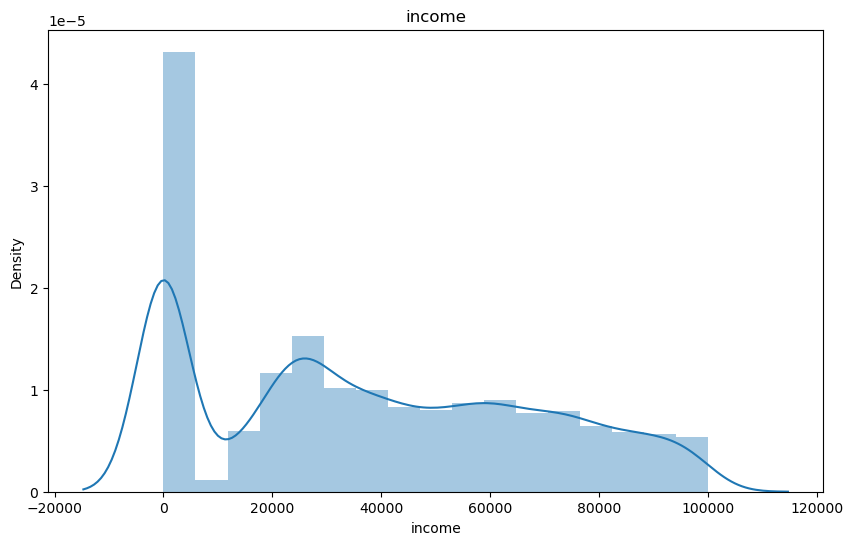

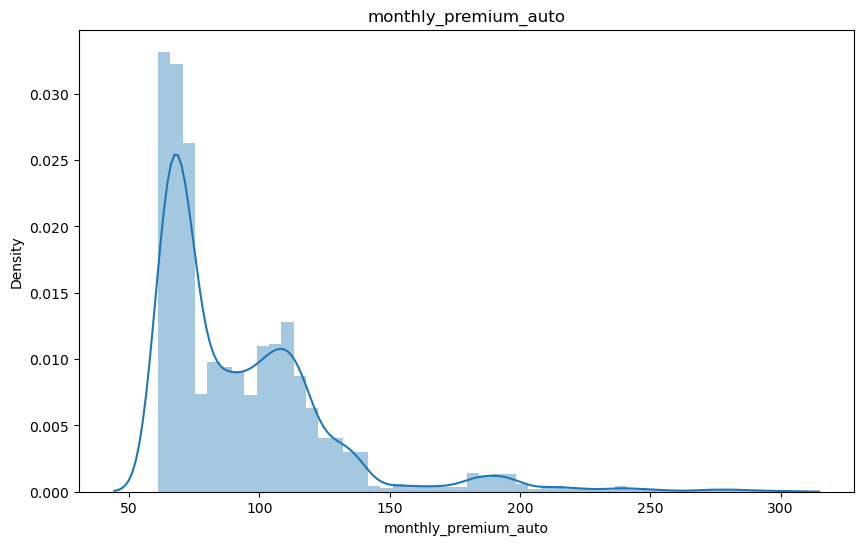

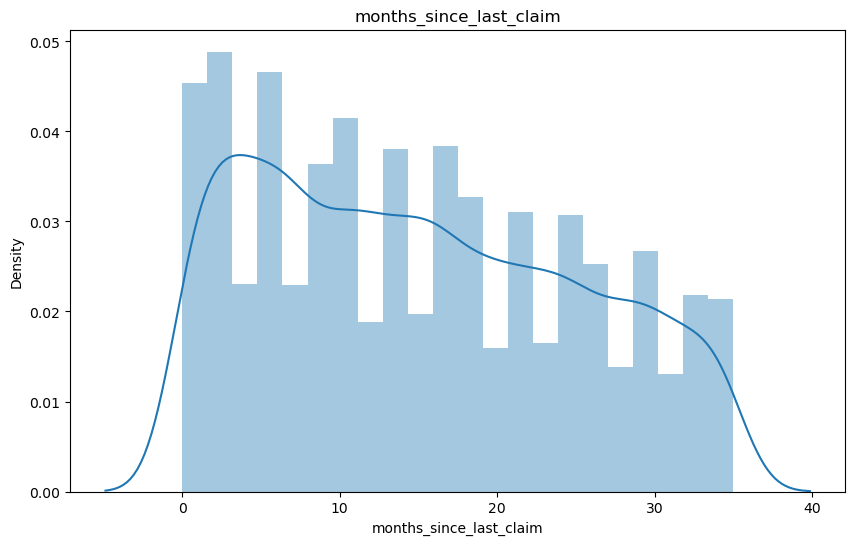

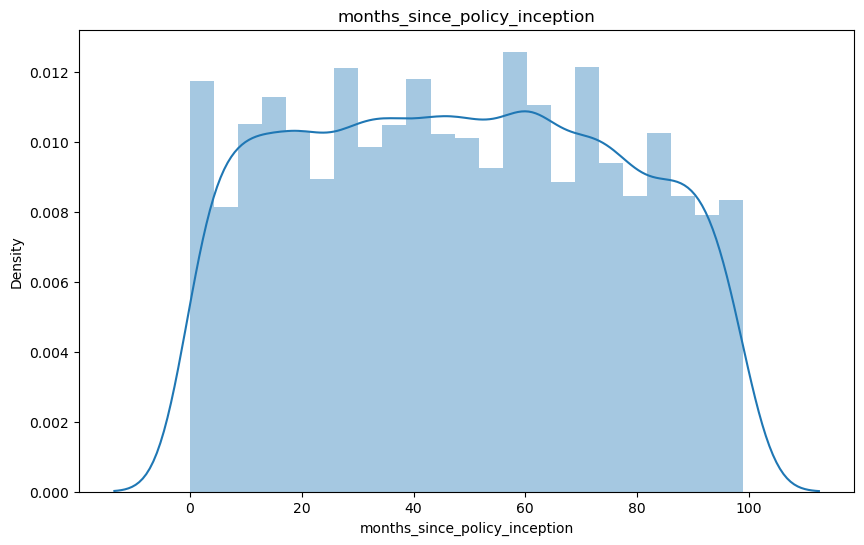

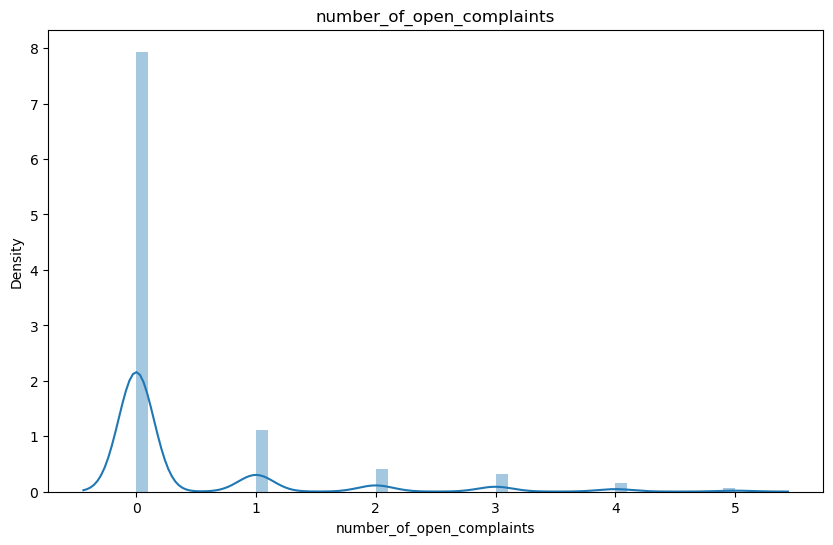

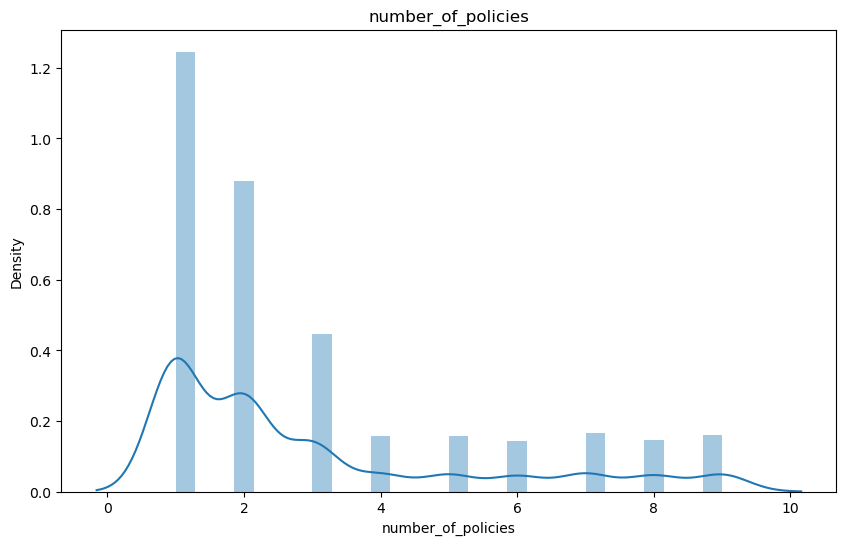

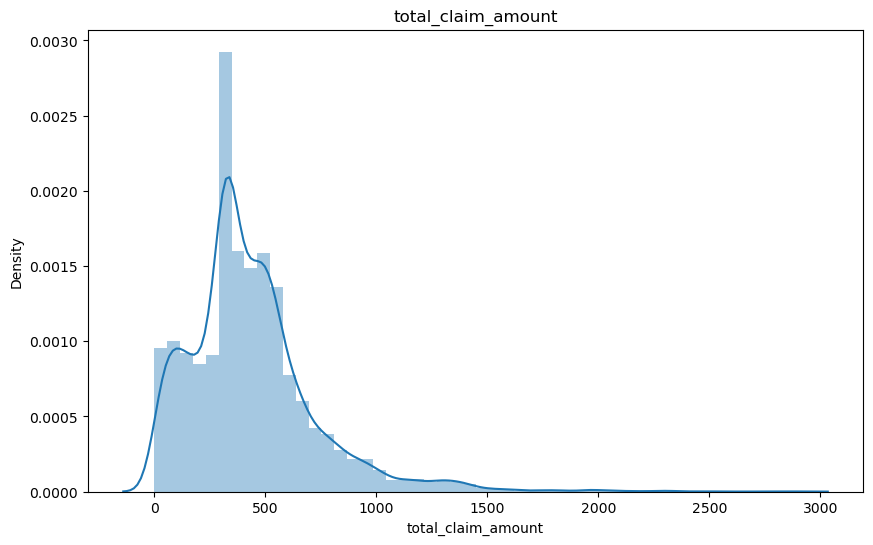

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(numerical[column]).set_title(column)
    plt.show()

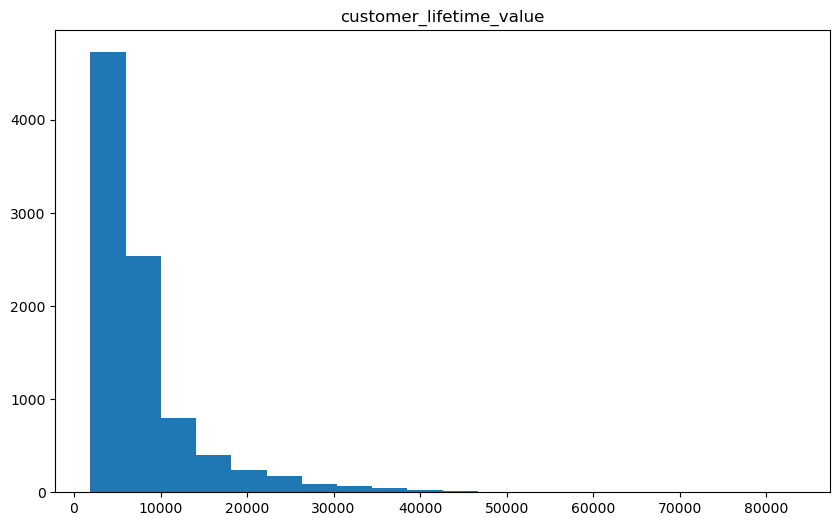

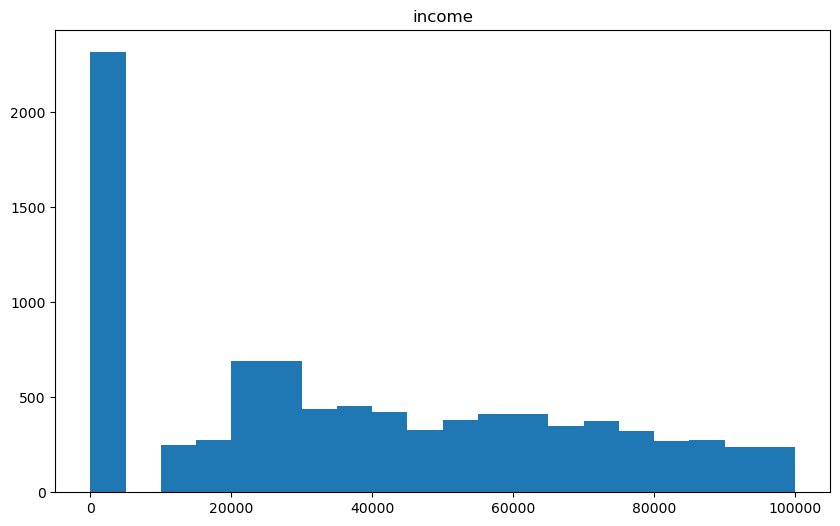

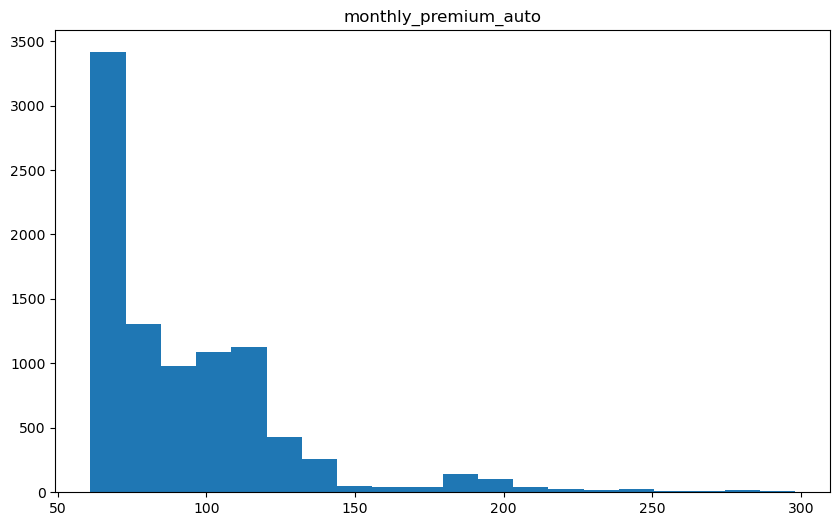

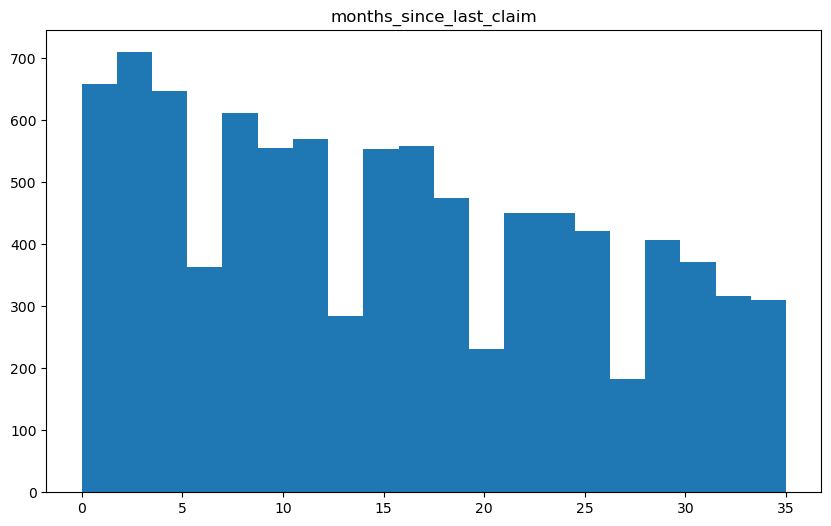

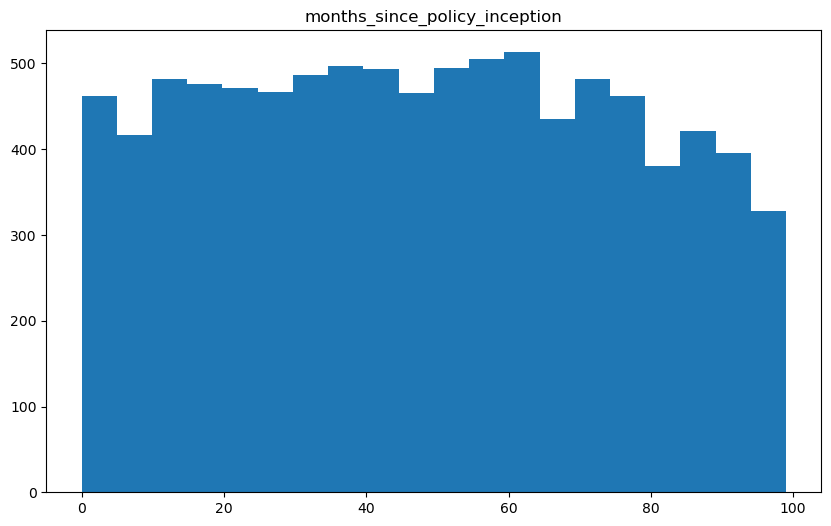

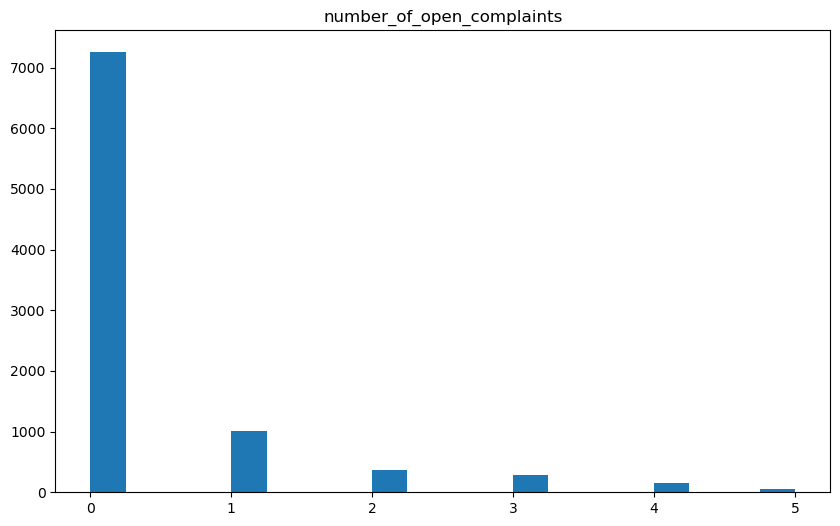

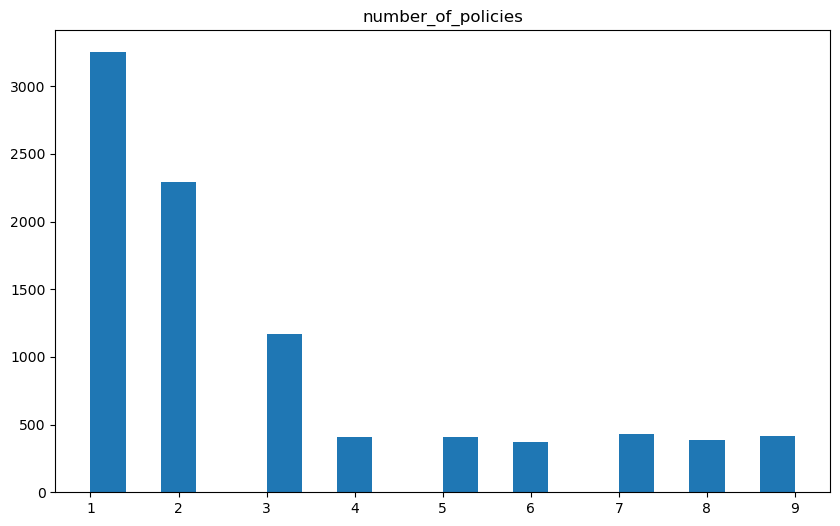

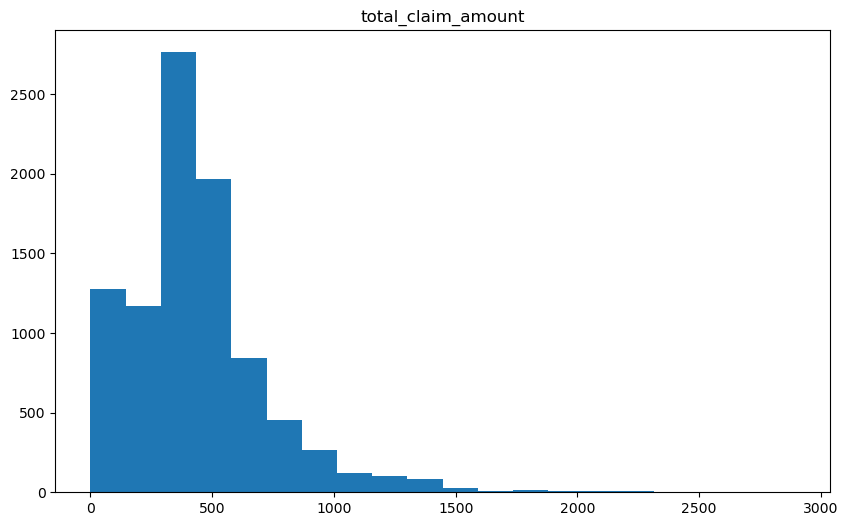

In [28]:
for column in numerical.columns:
    plt.figure(figsize=(10, 6)) 
    plt.hist(numerical[column], bins=20)
    plt.title(column)
    plt.show()

In [29]:
from scipy.stats import shapiro

column_data = numerical['income']
stat, p = shapiro(column_data)
print(f'Statistics={stat}, p-value={p}')

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.9216634035110474, p-value=0.0
Sample does not look Gaussian (reject H0)


In [30]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [31]:
#no collumns were dropped, no correlation higher then 0.9

# Lab Customer Analysis Round 5

In [32]:
#normalize(numerical)

In [33]:
def normalize_dataframe(customer, columns_to_normalize=None):
    if columns_to_normalize is None:
        
        numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
        columns_to_normalize = list(numerical_columns)
    
    customer_normalized = customer.copy()
    
    scaler = MinMaxScaler()
    
    customer_normalized[columns_to_normalize] = scaler.fit_transform(customer_normalized[columns_to_normalize])
    
    return customer_normalized

In [34]:
#  X-y split.

import statsmodels.api as sm
from statsmodels.formula.api import ols

Y = df['customer_lifetime_value']
X = df['customer_lifetime_value']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     customer_lifetime_value   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.357e+34
Date:                     Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                             15:45:47   Log-Likelihood:             2.2615e+05
No. Observations:                     9134   AIC:                        -4.523e+05
Df Residuals:                         9132   BIC:                        -4.523e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.494e-12   6.87e-14    -94.518      0.000   -6.63e-12   -6.36e-12
customer_lifetime_value     1.0000   6.51e-18   1.54e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                     6359.671   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113904.293
Skew:                          -3.156   Prob(JB):                         0.00
Kurtosis:                      19.107   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lab Customer Analysis Round 6

In [35]:
#One Hot/Label Encoding (categorical).

In [36]:
df = df.drop(['customer','state'], axis = 1)
df

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [37]:
df_d = pd.get_dummies(df, drop_first=True)
df_d

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response_Yes,coverage_Extended,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,True,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,False,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,False,False,...,False,False,True,False,False,False,False,False,True,False
9130,3096.511217,21604,79,14,28,0,1,379.200000,True,True,...,True,False,False,False,False,False,False,False,True,False
9131,8163.890428,0,85,9,37,3,2,790.784983,False,True,...,True,False,False,False,False,False,False,False,True,False
9132,7524.442436,21941,96,34,3,0,3,691.200000,False,True,...,True,False,False,False,False,False,False,False,False,False


In [38]:
#Concat DataFrames

In [39]:
concat = pd.concat([df, df_d], axis=0)
concat

,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,NaN,NaN,NaN,NaN,NaN,NaN,71941,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False
9130,3096.511217,NaN,NaN,NaN,NaN,NaN,NaN,21604,NaN,NaN,...,True,False,False,False,False,False,False,False,True,False
9131,8163.890428,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,True,False,False,False,False,False,False,False,True,False
9132,7524.442436,NaN,NaN,NaN,NaN,NaN,NaN,21941,NaN,NaN,...,True,False,False,False,False,False,False,False,False,False


In [40]:
#Linear Regression
#Train-test split.
#Apply linear regression.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [42]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [43]:
Y_pred = model.predict(X_test)

In [44]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R²: 1.0
MSE: 8.523650250178674e-24
RMSE: 2.919529114459843e-12
MAE: 1.887935772563673e-12


# Lab | Customer Analysis Round 7

In [45]:
#Modeling
#Description:
#Try to improve the linear regression model.

In [46]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Y = df['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis = 1)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y) # This is the R^2

predictions = lm.predict(X)

print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y, predictions)
mae = mean_absolute_error(Y, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.52
The intercept of the model is =  72.3909681918401
The coefficients of the model are =  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The mse of the model is =  40615.74326224917
The root mse of the model is =  201.53347925902824
The mean absolute error of the model is =  144.38290074277194


In [47]:

Y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:46:29   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            72.3910      8.744      8.279      0.000      55.252      89.530
customer_lifetime_value          -0.0007      0.000     -2.014      0.044      -0.001   -1.81e-05
income                           -0.0033   6.95e-05    -47.370      0.000      -0.003      -0.003
monthly_premium_auto              5.3425      0.067     79.934      0.000       5.212       5.474
months_since_last_claim          -0.1457      0.210     -0.695      0.487      -0.557       0.265
months_since_policy_inception    -0.1023      0.076     -1.352      0.176      -0.251       0.046
number_of_open_complaints        -1.3716      2.319     -0.591      0.554      -5.918       3.174
number_of_policies                0.2486      0.883      0.281      0.778      -1.483       1.980
==============================================================================
Omnibus:                      994.270   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6389.170
Skew:                           0.316   Prob(JB):                         0.00
Kurtosis:                       7.048   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')